# 1. Import the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data loading 

In [2]:
df_covid = pd.read_csv('covid_19_india.csv')
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,1/02/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/02/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/02/2020,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
df_covid.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


We are printing pair plot for the given data frame

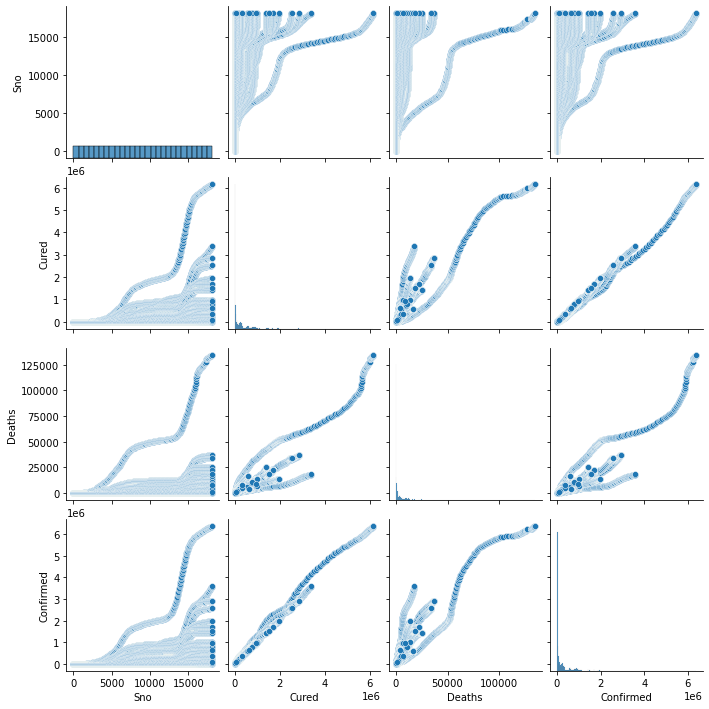

In [5]:
sns.pairplot(df_covid)

In [16]:
# I am taking date and confirmed columns as independent variables (X) to predict dependent variable deaths (y) 

X = df_covid[['Date', 'Confirmed']]    
y = df_covid['Deaths']

In [17]:
# I am just changing the data format according to pyhton understanding

X['Date'] = pd.to_datetime(X['Date'], format='%d/%m/%Y')

C:\Users\Utente\AppData\Local\Temp/ipykernel_2616/2896756606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = pd.to_datetime(X['Date'], format='%d/%m/%Y')


0       2020-01-30
1       2020-01-31
2       2020-02-01
3       2020-02-02
4       2020-02-03
           ...    
18105   2021-08-11
18106   2021-08-11
18107   2021-08-11
18108   2021-08-11
18109   2021-08-11
Name: Date, Length: 18110, dtype: datetime64[ns]


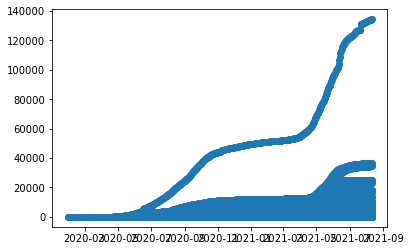

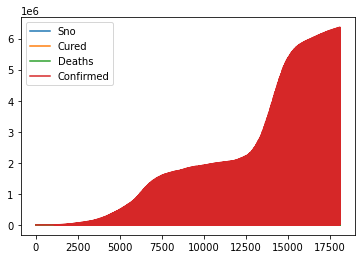

C:\Users\Utente\AppData\Local\Temp/ipykernel_2616/3138148109.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date2num'] = X['Date'].apply(lambda x:mdates.date2num(x))


In [18]:
# Matplotlib represents dates using floating point numbers specifying the number of days

import matplotlib.dates as mdates

print (X['Date'])

plt.plot_date(X['Date'], y, xdate = True, ydate = False)
df_covid.plot()
plt.show()

Date = X.loc[:, ['Date']]  
X['Date2num'] = X['Date'].apply(lambda x:mdates.date2num(x))
del X['Date']

# 3. Data spilting 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [13]:
# I am just defininig date as extraction as loc in X dataset and I am printing len(X) with varible n
n = len(X)
print(n)

test_data  = Date.loc[:int(n*0.3)]
train_data = Date.loc[int(n*0.3)+1:]

18110


## Linear regresssion 

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

# 4. Performance caluculation

Mean Absolute Error (MAE): The average absolute difference between predicted and actual values.

Mean Squared Error (MSE): The average squared difference between predicted and actual values.

Root Mean Squared Error (RMSE): The square root of the MSE.

R2 Score (Coefficient of Determination): Measures the proportion of variance explained by the model.

## Mean Absolute Error (MAE)

In [24]:
from sklearn.metrics import mean_absolute_error

y_pred = LR.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
print(" Mean Absolute Error is : ", MAE)

 Mean Absolute Error is :  1874.673340929082


## Mean Squared Error (MSE)

In [26]:
from sklearn.metrics import mean_squared_error

y_pred = LR.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print(" Mean Squared Error is : ", MSE)

 Mean Squared Error is :  17627486.00499592


## Root Mean Squared Error (RMSE) 

In [34]:
RMSE = np.sqrt(MSE)
print(" Root Mean Squared Error is : ", RMSE)

 Root Mean Squared Error is :  4198.509974383283


In [35]:
import math
RMSE = math.sqrt(MSE)
print(" Root Mean Squared Error is : ", RMSE)

 Root Mean Squared Error is :  4198.509974383283


## R2 Score

In [37]:
from sklearn.metrics import r2_score

y_pred = LR.predict(X_test)
R2 = r2_score(y_test, y_pred)
print(" R2 Score is : ", R2)

 R2 Score is :  0.8627668883472548


## plotting actual cases and predicted cases

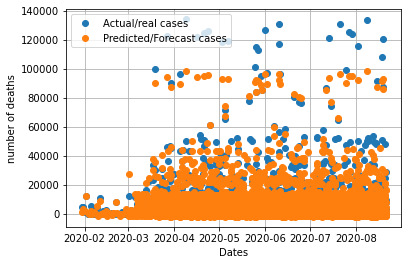

In [64]:
plt.plot_date(test_data[:-1], y_test, xdate= True, ydate= False, label= 'Actual/real cases')
plt.plot_date(test_data[:-1], y_pred, xdate= True, ydate =False, label='Predicted/Forecast cases')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('number of deaths')
plt.grid()

In [57]:
# plt.xticks(rotation=135)
# plt.plot_date(test_data[:-1], y_test, xdate= True, ydate= False, label= 'Actual/real cases')
# plt.plot_date(test_data[:-1], y_pred, xdate= True, ydate =False, label='Predicted/Forecast cases')
# plt.legend()
# plt.xlabel('Dates')
# plt.ylabel('number of deaths')
# plt.grid()

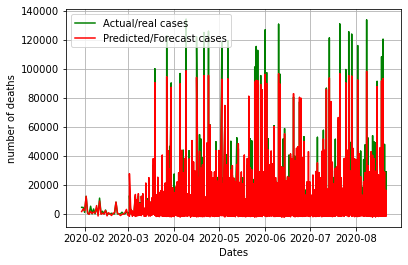

In [65]:
plt.plot_date(test_data[:-1], y_test, xdate= True, ydate= False, fmt='g-',label= 'Actual/real cases')
plt.plot_date(test_data[:-1], y_pred, xdate= True, ydate =False, fmt='r-', label='Predicted/Forecast cases')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('number of deaths')
plt.grid()